In [ ]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.insert(0, './src')
from src.table_utils import pretty_matplotlib_config

sns.set(style="whitegrid")

file_path = './tables/full_mis_rocauc_only_risks.csv'

In [2]:
mis_data = pd.read_csv(file_path)
# mis_data = mis_data[mis_data.base_rule != 'Neglog']

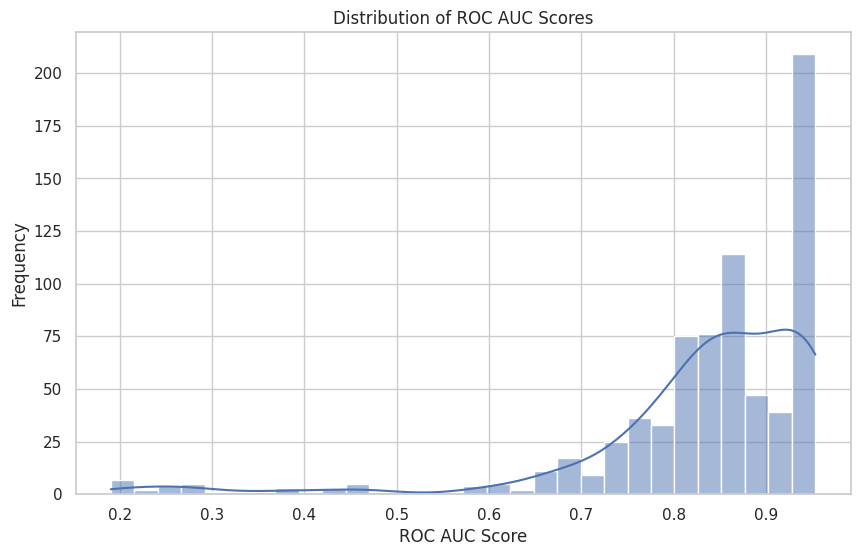

In [3]:
roc_auc_summary = mis_data['RocAucScore'].describe()

# Plotting the distribution of RocAucScores
plt.figure(figsize=(10, 6))
sns.histplot(mis_data['RocAucScore'], bins=30, kde=True)
plt.title('Distribution of ROC AUC Scores')
plt.xlabel('ROC AUC Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

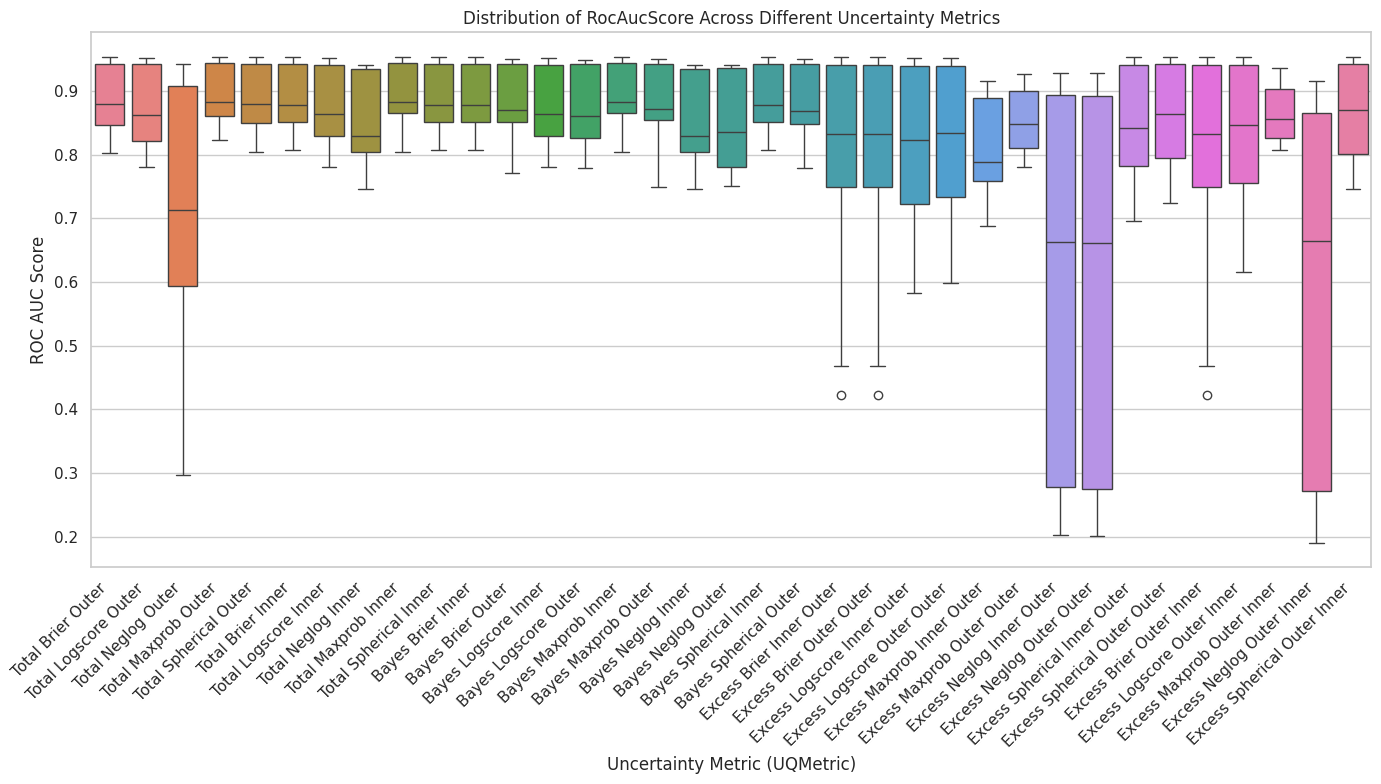

In [4]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=mis_data, x='UQMetric', y='RocAucScore', hue='UQMetric', legend=False)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of RocAucScore Across Different Uncertainty Metrics')
plt.xlabel('Uncertainty Metric (UQMetric)')
plt.ylabel('ROC AUC Score')
plt.tight_layout()
plt.show()

<Figure size 1800x1000 with 0 Axes>

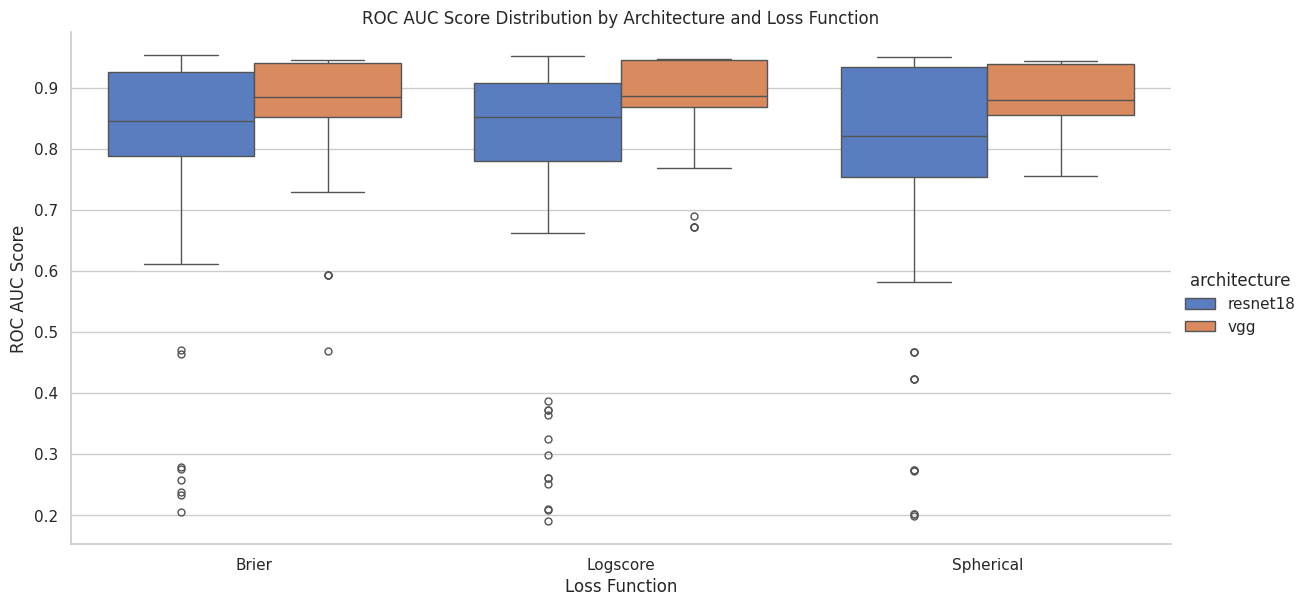

In [5]:
plt.figure(figsize=(18, 10))

# Plotting the distribution of RocAucScore for each architecture and loss function combination
sns.catplot(x="LossFunction", y="RocAucScore", hue="architecture", kind="box", data=mis_data, height=6, aspect=2, palette="muted")
plt.title('ROC AUC Score Distribution by Architecture and Loss Function')
plt.xlabel('Loss Function')
plt.ylabel('ROC AUC Score')

plt.show()


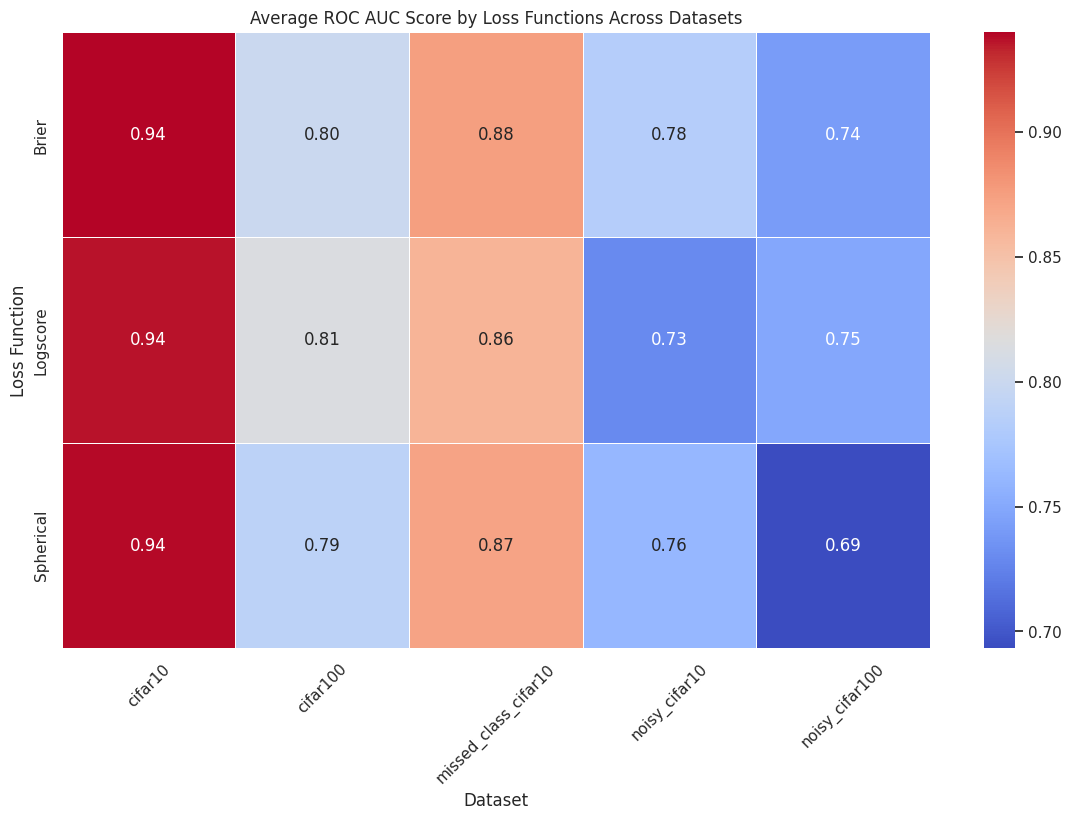

In [6]:
# Grouping data to compare the impact of loss functions on ROC AUC scores
loss_function_comparison = mis_data.groupby(['LossFunction', 'training_dataset'])['RocAucScore'].mean().unstack()

# Plotting the impact of loss functions on ROC AUC scores
plt.figure(figsize=(14, 8))
sns.heatmap(loss_function_comparison, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Average ROC AUC Score by Loss Functions Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Loss Function')
plt.xticks(rotation=45)
plt.show()


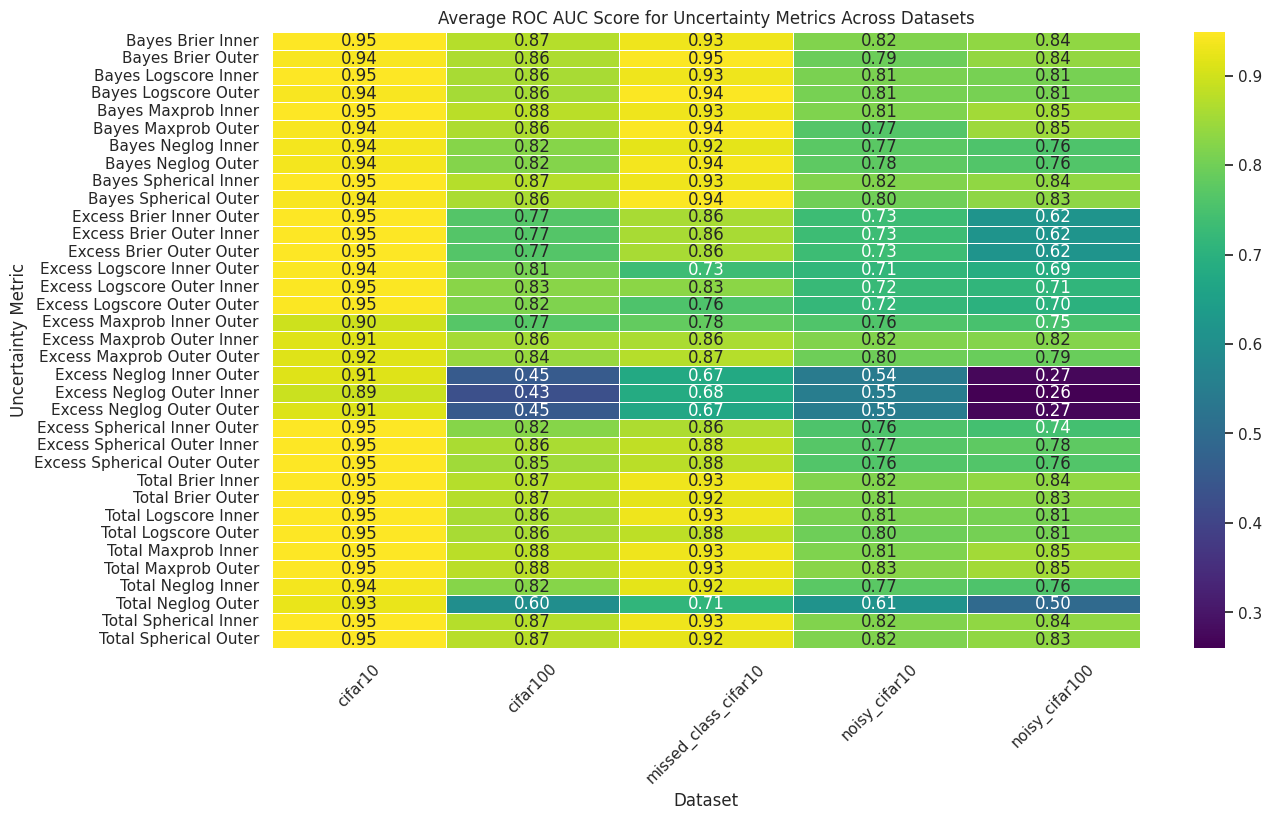

In [7]:
# Grouping data to compare the performance of different uncertainty metrics across datasets
performance_comparison = mis_data.groupby(['UQMetric', 'training_dataset'])['RocAucScore'].mean().unstack()

# Plotting the performance of different uncertainty metrics across datasets
plt.figure(figsize=(14, 8))
sns.heatmap(performance_comparison, annot=True, fmt=".2f", cmap='viridis', linewidths=.5)
plt.title('Average ROC AUC Score for Uncertainty Metrics Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Uncertainty Metric')
plt.xticks(rotation=45)
plt.show()


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = mis_data.copy()
same_loss_base = df[df['LossFunction'] == df['base_rule']]
diff_loss_base = df[df['LossFunction'] != df['base_rule']]

In [9]:
# Calculate summary statistics
summary_same = same_loss_base['RocAucScore'].describe()
summary_diff = diff_loss_base['RocAucScore'].describe()

# Print summary statistics in a table
summary_table = pd.DataFrame({
    'Same LossFunction and base_rule': summary_same,
    'Different LossFunction and base_rule': summary_diff
})

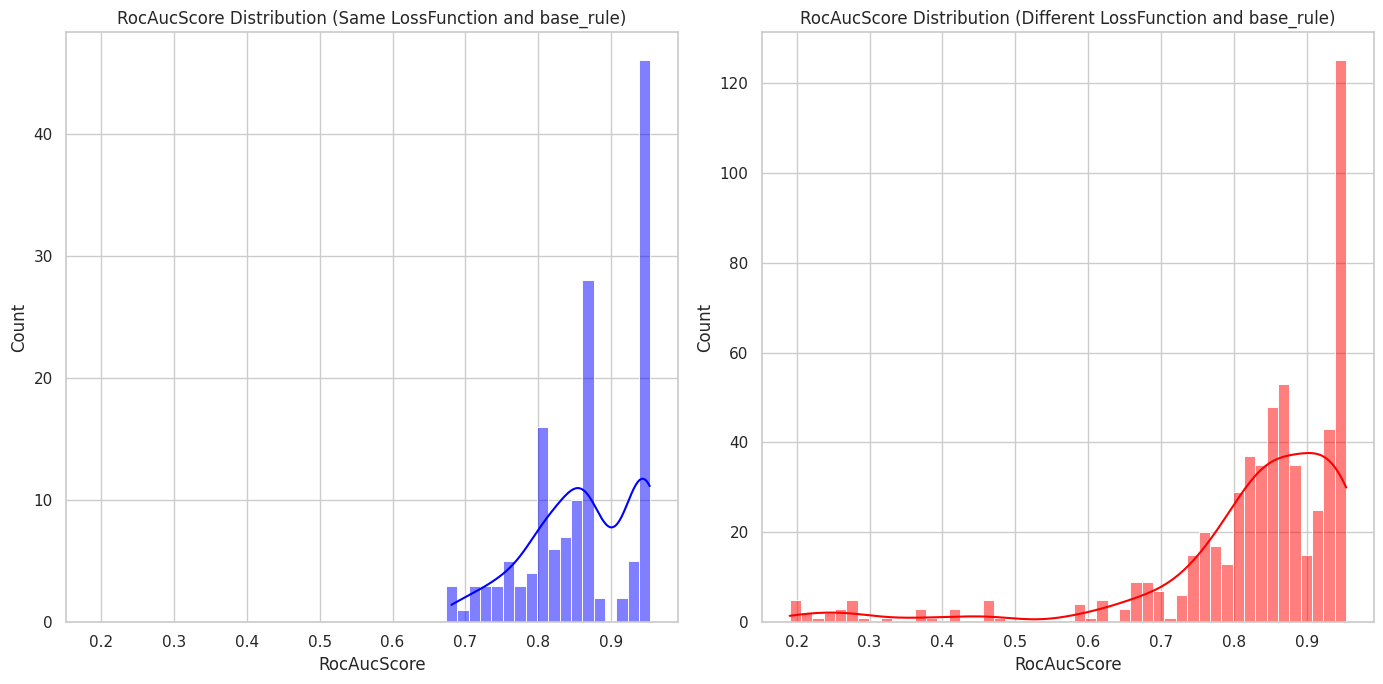

,Same LossFunction and base_rule,Different LossFunction and base_rule
count,147.000000,588.000000
mean,0.863112,0.826107
std,0.074476,0.149527
min,0.680669,0.190535
25%,0.808321,0.799212
50%,0.866324,0.860988
75%,0.941855,0.933176
max,0.952572,0.953610


In [10]:
# Plot the distributions
plt.figure(figsize=(14, 7))

values = df['RocAucScore'].values
bins_ = np.linspace(values.min(), values.max(), 50)

# Distribution plot for same values
plt.subplot(1, 2, 1)
sns.histplot(same_loss_base['RocAucScore'], kde=True, color='blue', bins=bins_)
plt.title('RocAucScore Distribution (Same LossFunction and base_rule)')
plt.xlabel('RocAucScore')

# Distribution plot for different values
plt.subplot(1, 2, 2)
sns.histplot(diff_loss_base['RocAucScore'], kde=True, color='red', bins=bins_)
plt.title('RocAucScore Distribution (Different LossFunction and base_rule)')
plt.xlabel('RocAucScore')

plt.tight_layout()
plt.show()

summary_table

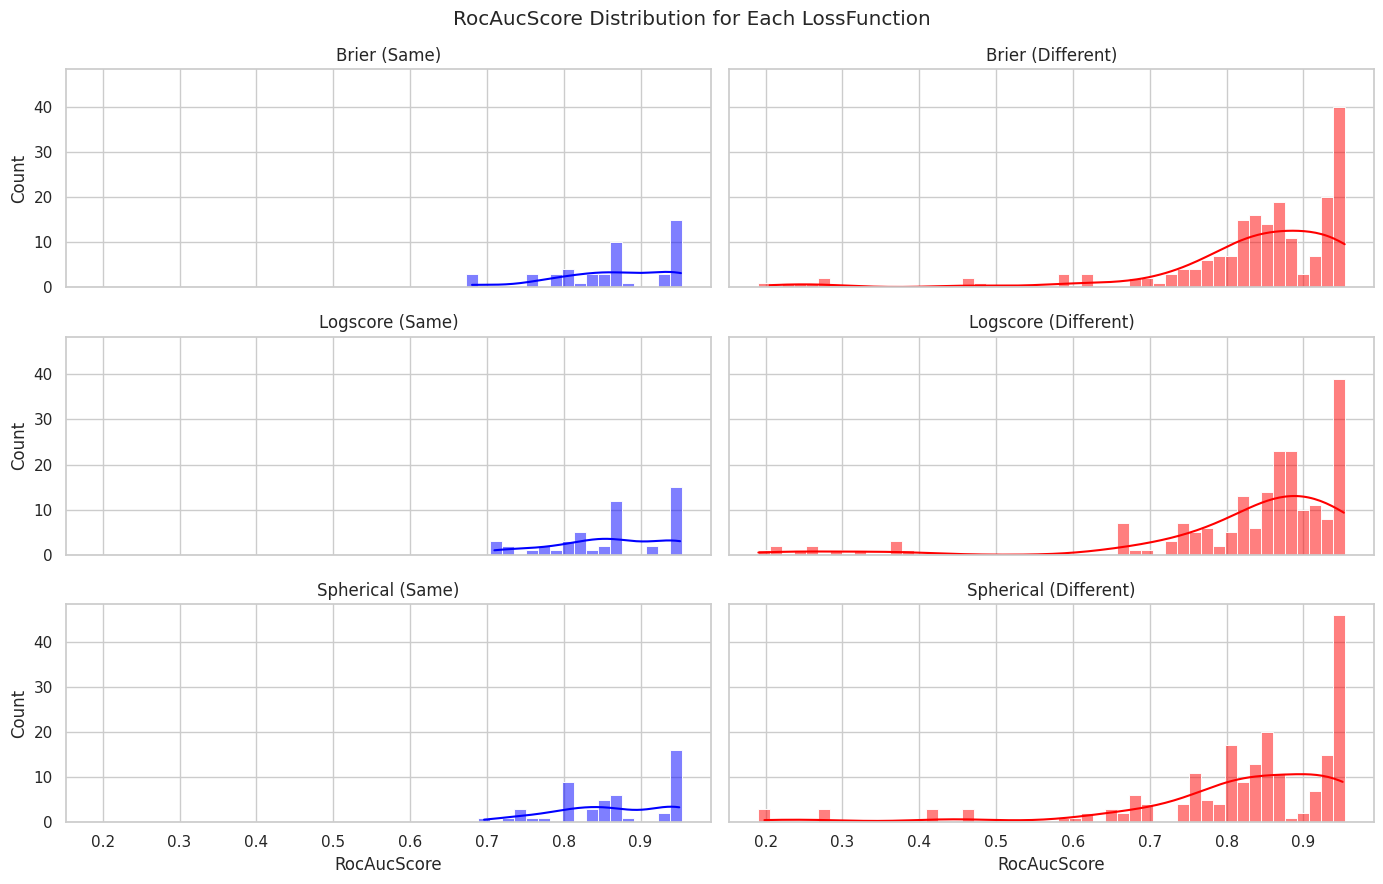

In [11]:
# Get unique LossFunction values
loss_functions = df['LossFunction'].unique()

# Create a figure with subplots for each LossFunction
n = len(loss_functions)
fig, axes = plt.subplots(n, 2, figsize=(14, n*3), sharex=True, sharey=True)
fig.suptitle('RocAucScore Distribution for Each LossFunction')

# Iterate through each LossFunction value
for i, loss_function in enumerate(loss_functions):
    same_loss_base = df[(df['LossFunction'] == loss_function) & (df['LossFunction'] == df['base_rule'])]
    diff_loss_base = df[(df['LossFunction'] == loss_function) & (df['LossFunction'] != df['base_rule'])]
    
    # Plot distributions
    sns.histplot(same_loss_base['RocAucScore'], kde=True, color='blue', ax=axes[i, 0], bins=bins_)
    axes[i, 0].set_title(f'{loss_function} (Same)')
    axes[i, 0].set_xlabel('RocAucScore')
    
    sns.histplot(diff_loss_base['RocAucScore'], kde=True, color='red', ax=axes[i, 1], bins=bins_)
    axes[i, 1].set_title(f'{loss_function} (Different)')
    axes[i, 1].set_xlabel('RocAucScore')

plt.tight_layout()
plt.show()

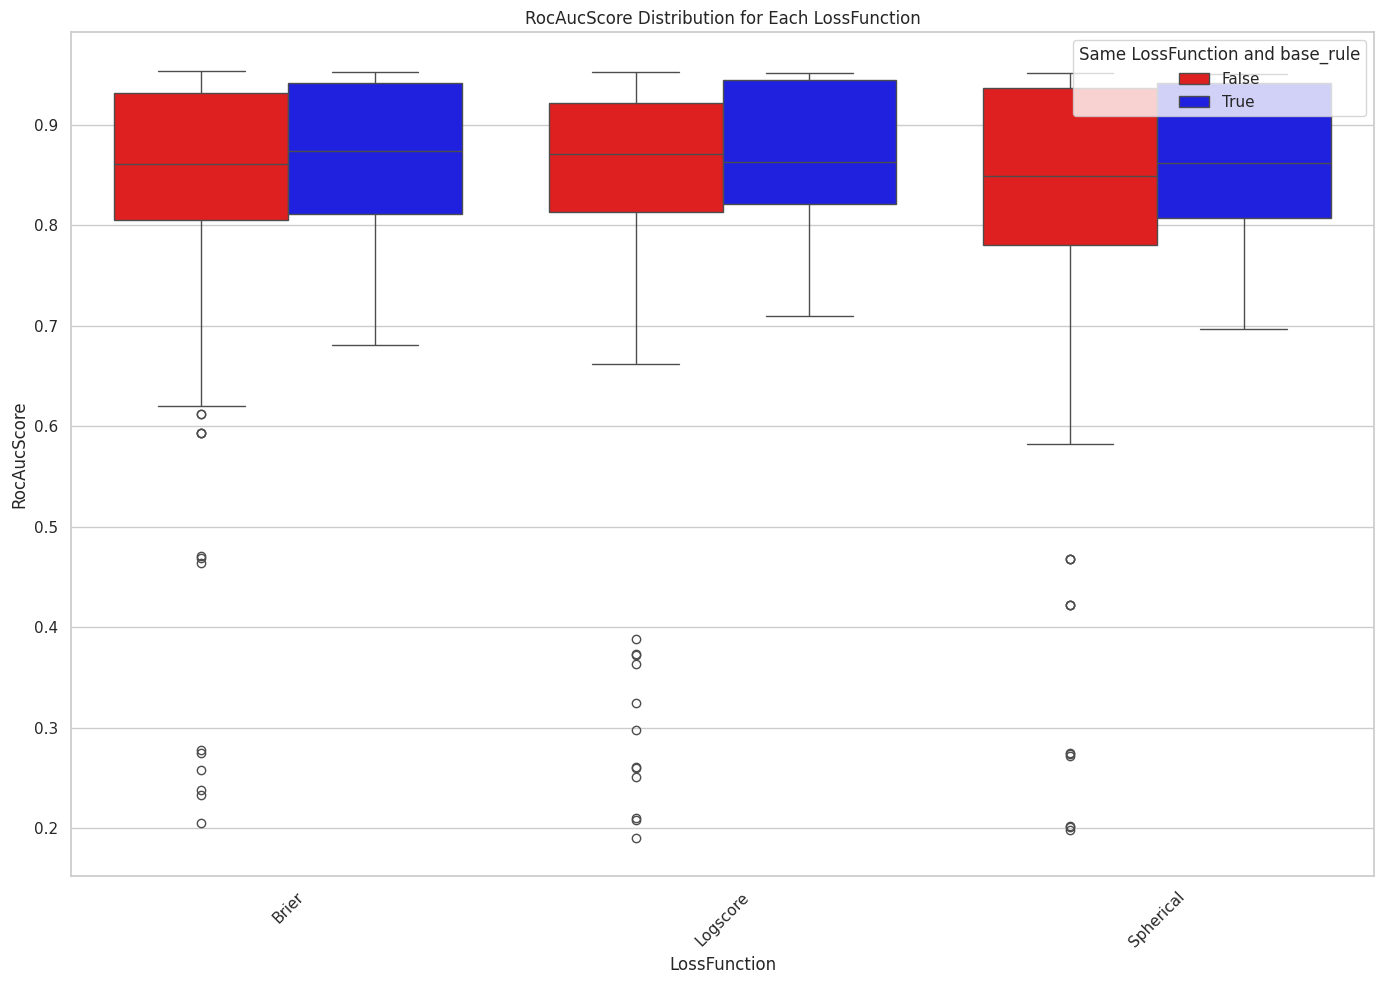

In [12]:
# Create a new column to indicate if LossFunction and base_rule are the same
df['Same'] = df['LossFunction'] == df['base_rule']

# Set the plot size
plt.figure(figsize=(14, 10))

# Create boxplots for each LossFunction
sns.boxplot(x='LossFunction', y='RocAucScore', hue='Same', data=df, palette=['red', 'blue'])

# Customize the plot
plt.title('RocAucScore Distribution for Each LossFunction')
plt.xlabel('LossFunction')
plt.ylabel('RocAucScore')
plt.legend(title='Same LossFunction and base_rule', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

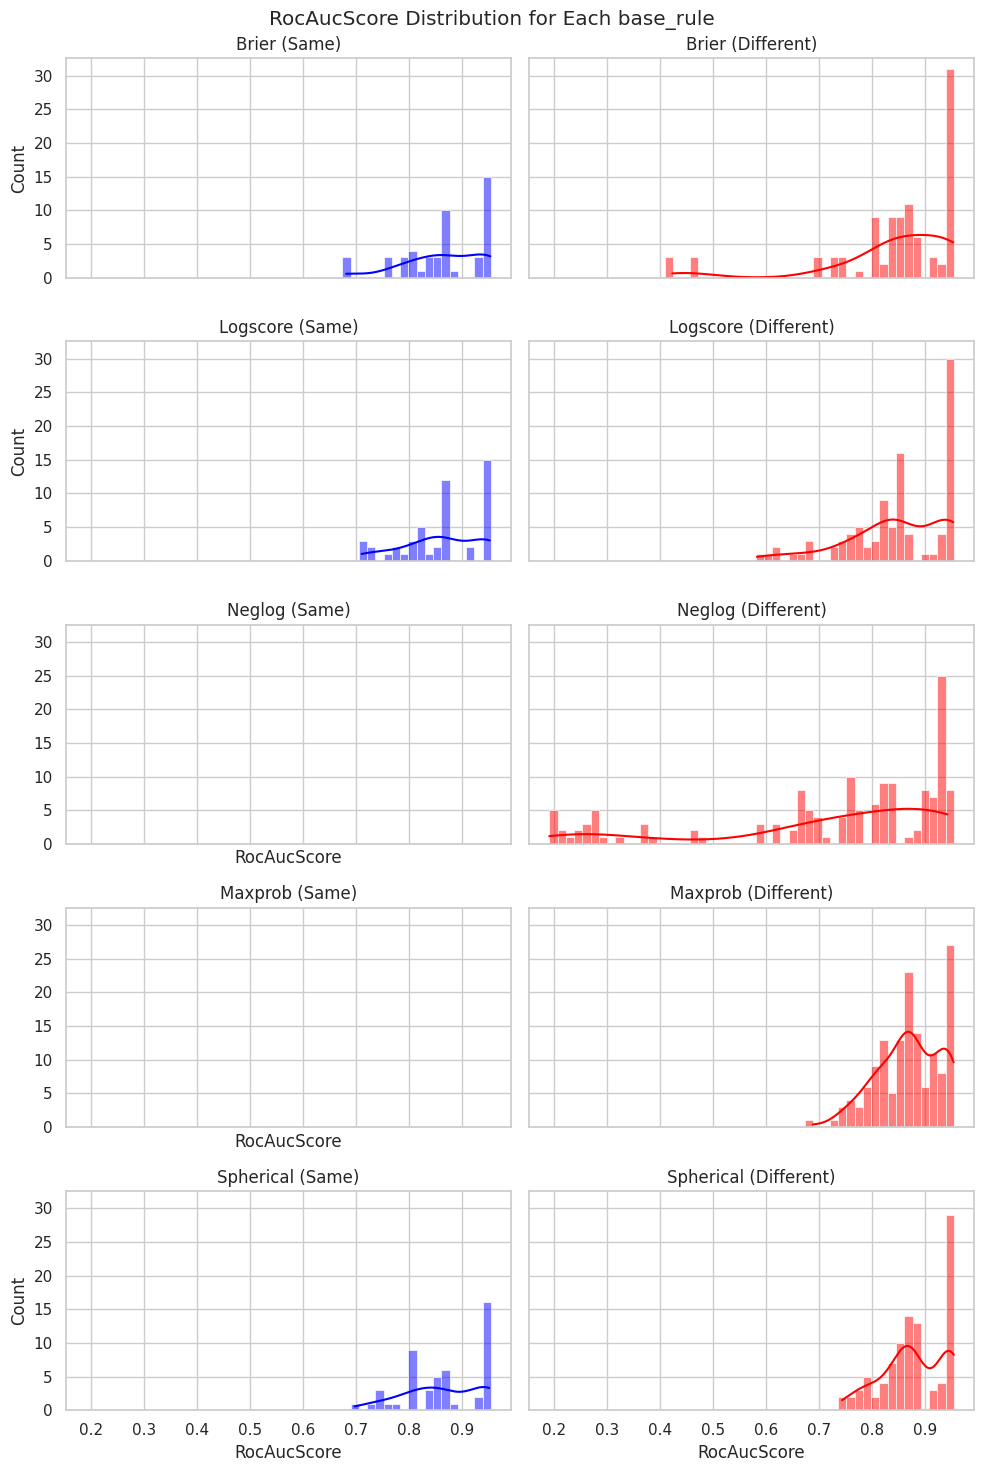

In [13]:
# Get unique base_rule values
base_rules = df['base_rule'].unique()

# Create a figure with subplots for each base_rule
n = len(base_rules)
fig, axes = plt.subplots(n, 2, figsize=(10, n*3), sharex=True, sharey=True)
fig.suptitle('RocAucScore Distribution for Each base_rule')

# Iterate through each base_rule value
for i, base_rule in enumerate(base_rules):
    same_loss_base = df[(df['base_rule'] == base_rule) & (df['LossFunction'] == df['base_rule'])]
    diff_loss_base = df[(df['base_rule'] == base_rule) & (df['LossFunction'] != df['base_rule'])]
    
    # Plot distributions
    sns.histplot(same_loss_base['RocAucScore'], kde=True, color='blue', ax=axes[i, 0], bins=bins_)
    axes[i, 0].set_title(f'{base_rule} (Same)')
    axes[i, 0].set_xlabel('RocAucScore')
    
    sns.histplot(diff_loss_base['RocAucScore'], kde=True, color='red', ax=axes[i, 1], bins=bins_)
    axes[i, 1].set_title(f'{base_rule} (Different)')
    axes[i, 1].set_xlabel('RocAucScore')

plt.tight_layout()
plt.show()

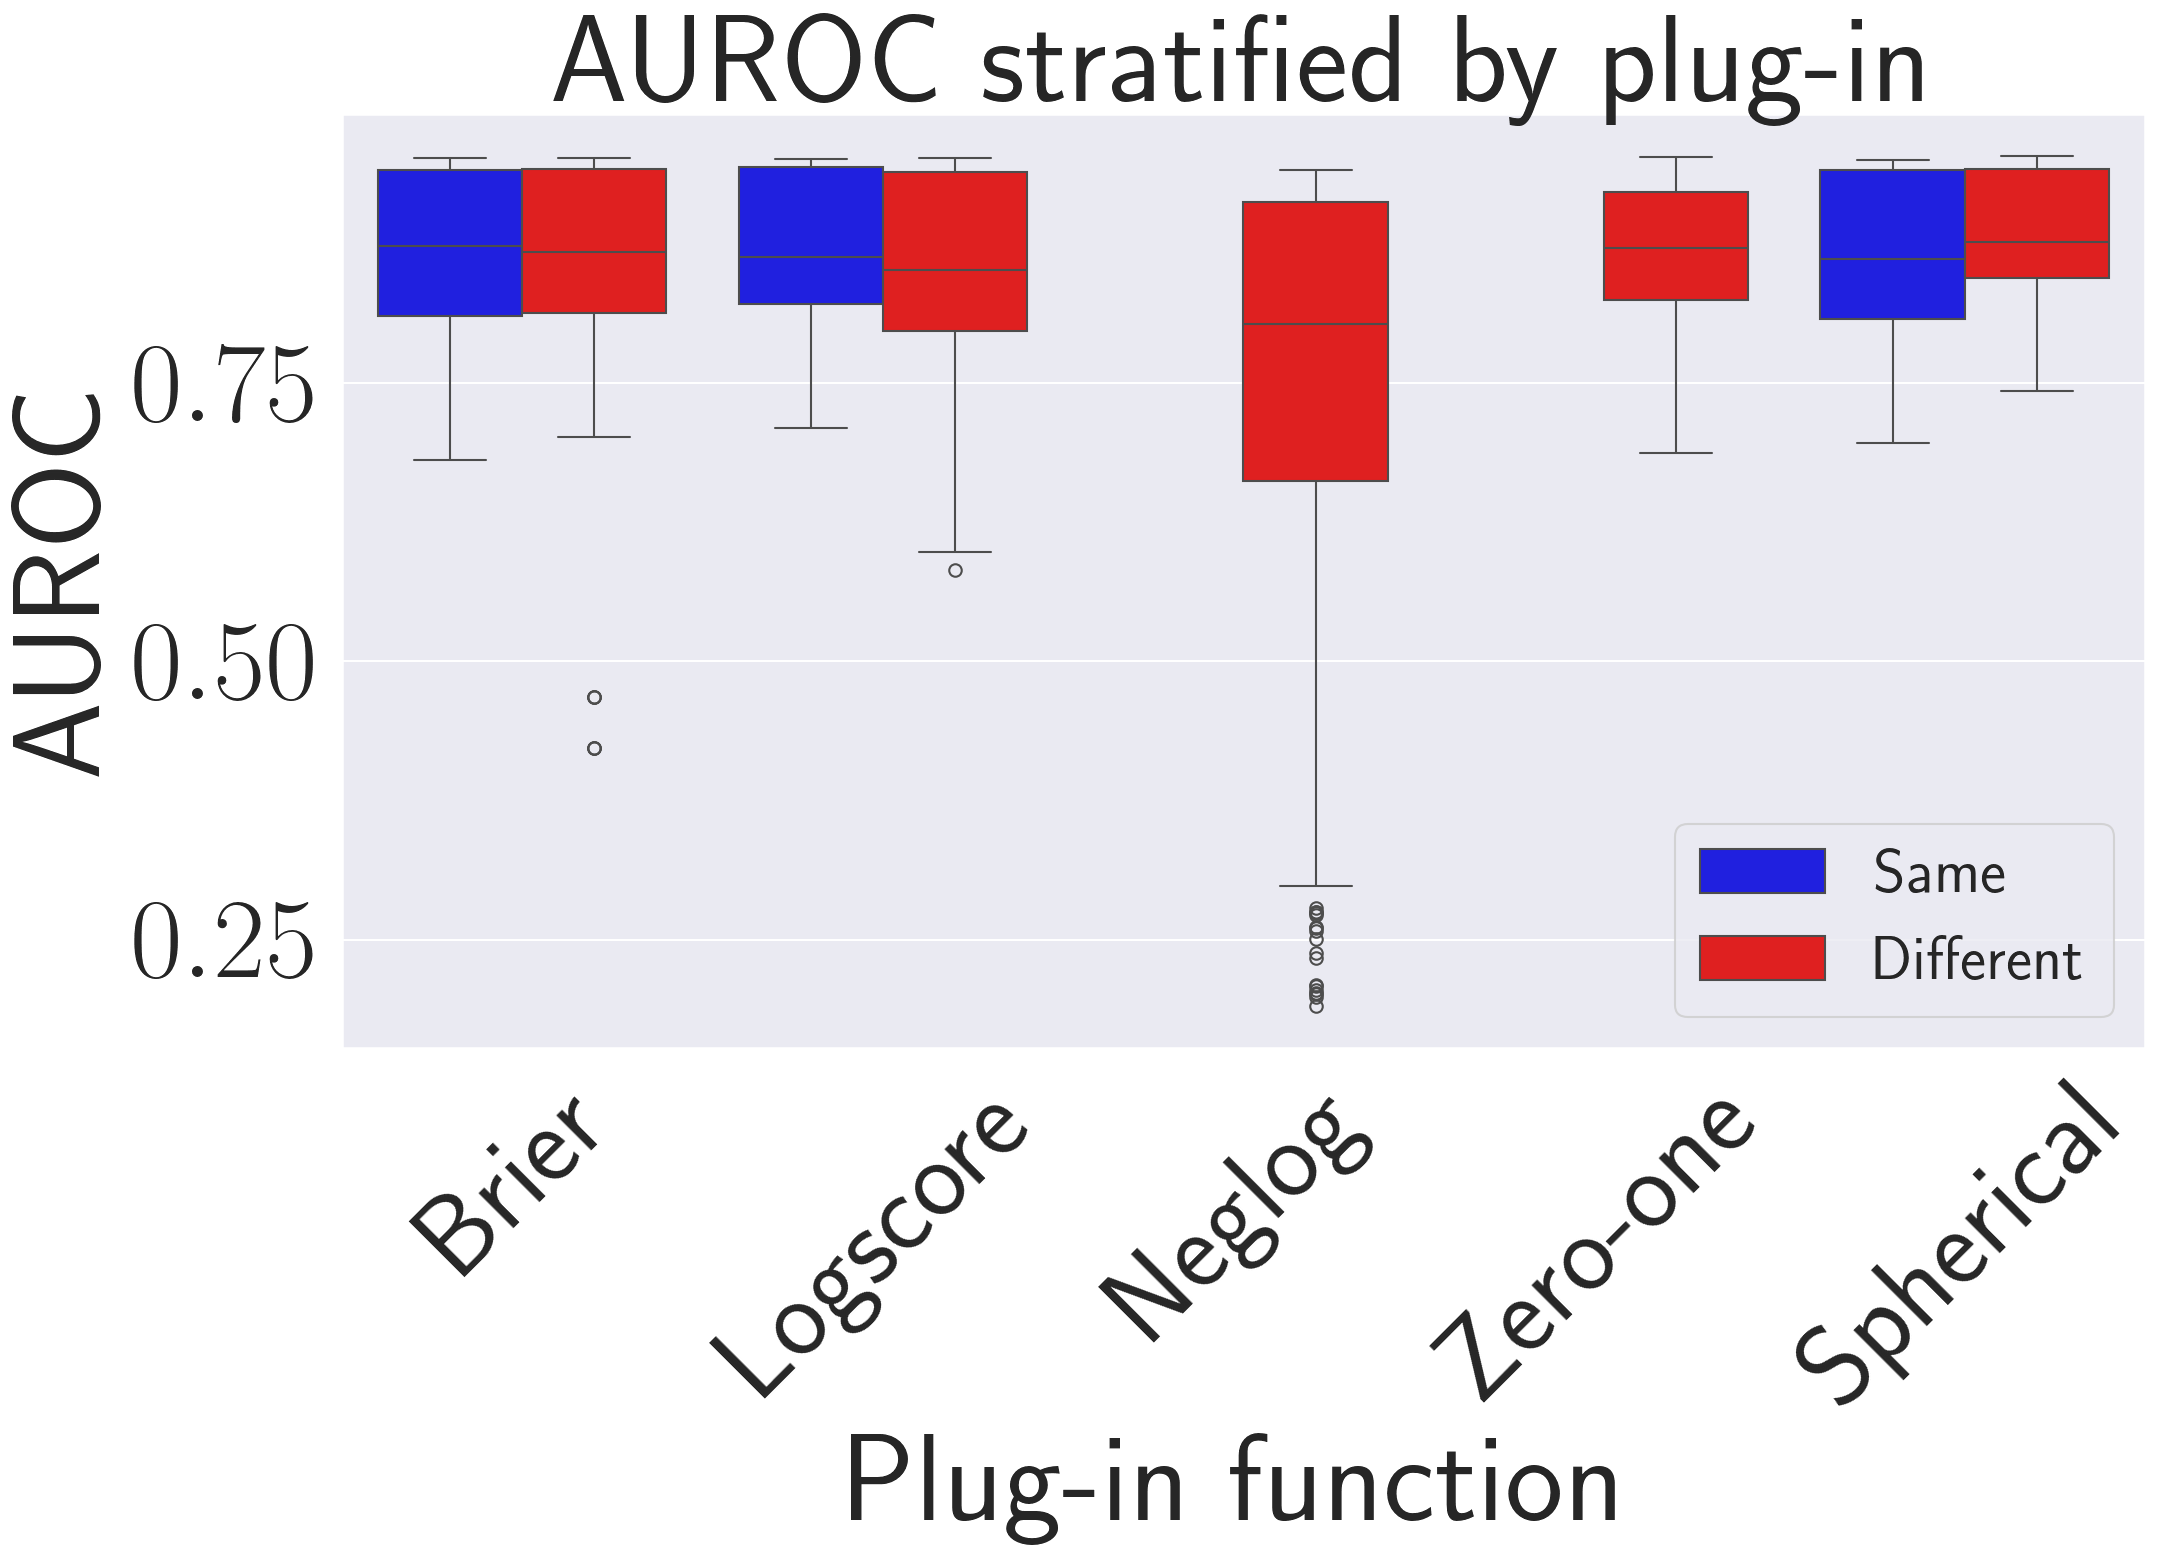

In [26]:
# Create a new column to indicate if LossFunction and base_rule are the same
df['Same'] = df['LossFunction'] == df['base_rule']
df['Same'] = df['Same'].replace({
    False: "Different",
    True: "Same",
})

df['base_rule'] = df['base_rule'].replace({
    "Maxprob": "Zero-one",
})

pretty_matplotlib_config(fontsize=50)
sns.set(font_scale=5)  # crazy big
# Set the plot size
plt.figure(figsize=(16, 12), dpi=150)

# Create boxplots for each base_rule
sns.boxplot(x='base_rule', y='RocAucScore', hue='Same', data=df, palette=['blue', 'red'])

plt.title('AUROC stratified by plug-in')
plt.xlabel('Plug-in function')
plt.ylabel('AUROC')
plt.legend(title='Same LossFunction and base_rule', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

plt.legend(prop={'size': 30}, loc=4)
plt.tight_layout()

plt.savefig('imgs/mis_auroc_stratified_by_plugin.pdf')
plt.show()

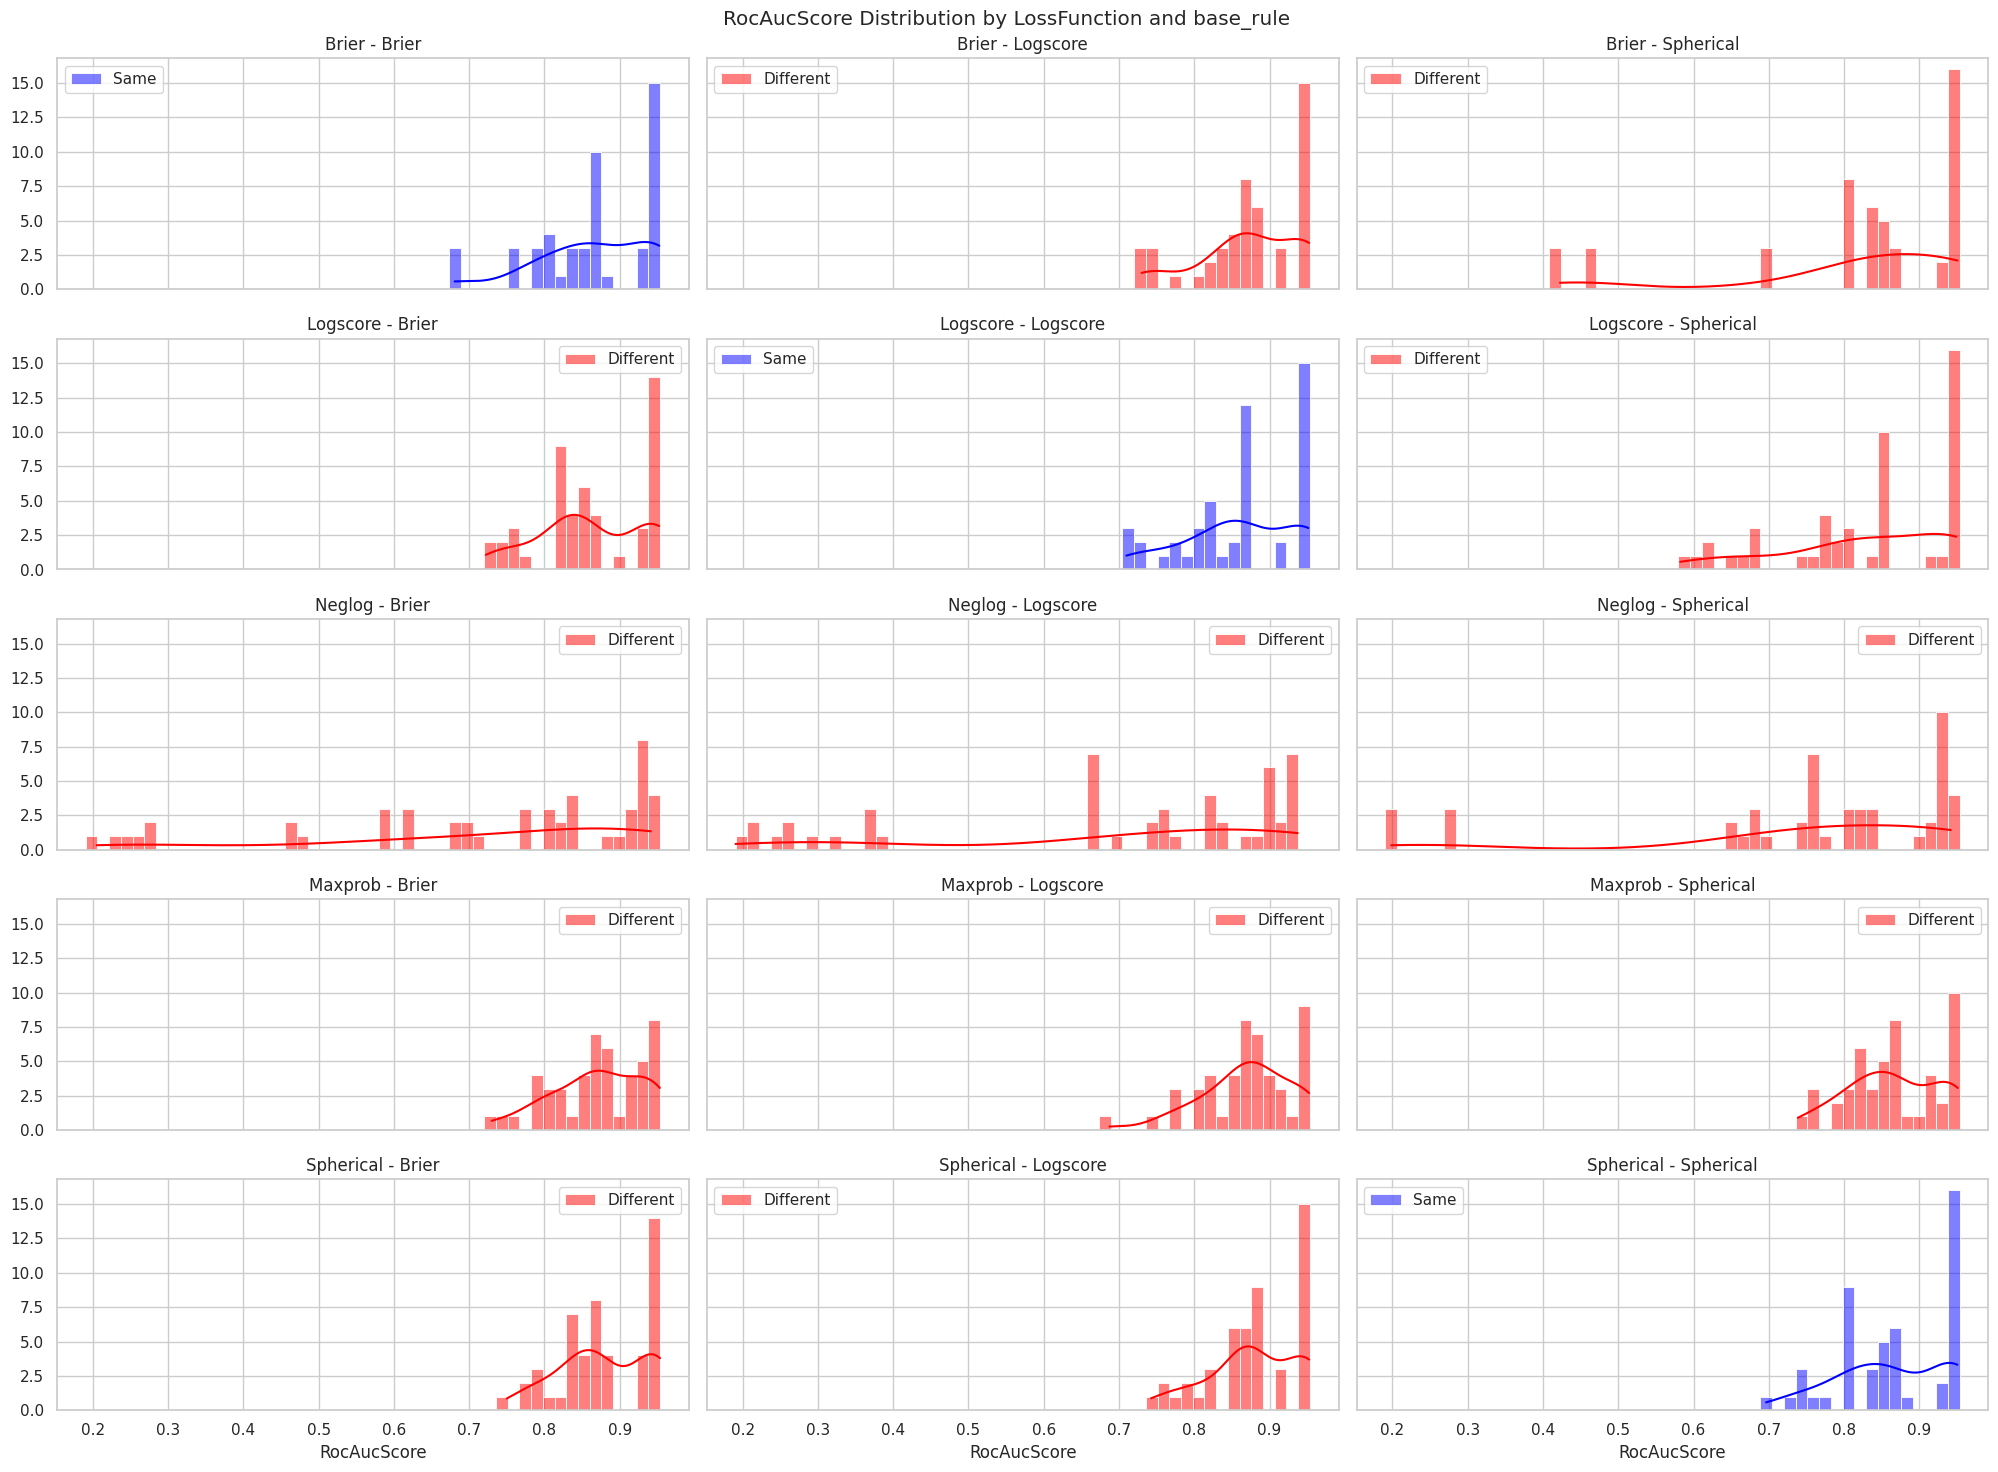

In [15]:
# Get unique LossFunction and base_rule values
loss_functions = df['LossFunction'].unique()
base_rules = df['base_rule'].unique()

# Create a figure with subplots for each combination of LossFunction and base_rule
fig, axes = plt.subplots(len(base_rules), len(loss_functions), figsize=(20, 15), sharex=True, sharey=True)
fig.suptitle('RocAucScore Distribution by LossFunction and base_rule')

# Iterate through each combination of LossFunction and base_rule
for i, base_rule in enumerate(base_rules):
    for j, loss_function in enumerate(loss_functions):
        subset = df[(df['base_rule'] == base_rule) & (df['LossFunction'] == loss_function)]
        same_subset = subset[subset['Same']]
        diff_subset = subset[~subset['Same']]
        
        if not same_subset.empty:
            sns.histplot(same_subset['RocAucScore'], kde=True, color='blue', ax=axes[i, j], label='Same', bins=bins_)
        if not diff_subset.empty:
            sns.histplot(diff_subset['RocAucScore'], kde=True, color='red', ax=axes[i, j], label='Different', bins=bins_)
        
        axes[i, j].set_title(f'{base_rule} - {loss_function}')
        axes[i, j].set_xlabel('RocAucScore')
        axes[i, j].set_ylabel('')
        axes[i, j].legend()

plt.tight_layout()
plt.show()